In [58]:
import pandas as pd

# Step 1: Data Preparation
# Load your dataset into a variable 'data'
data = pd.read_csv('/content/sample_data/Pre-Registration Summary for Moudud.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Extract relevant date features from the "Date" column
data['Date'] = pd.to_datetime(data['Date'])  # Convert "Date" to datetime type
data


,Date,Day Total,Month Total
0,2016-03-23,356,90434
1,2016-03-24,7921,90434
2,2016-03-27,24640,90434
3,2016-03-28,53740,90434
4,2016-03-29,2123,90434
...,...,...,...
1764,2023-09-13,243,3654
1765,2023-09-14,322,3654
1766,2023-09-17,338,3654
1767,2023-09-18,344,3654


In [59]:
# Delete the first 347 rows
data = data.iloc[347:]

# Reset the index after deleting rows
data.reset_index(drop=True, inplace=True)
data


,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1417,2023-09-13,243,3654
1418,2023-09-14,322,3654
1419,2023-09-17,338,3654
1420,2023-09-18,344,3654


In [60]:
# Define the cutoff date
cutoff_date = pd.to_datetime('5/31/2023')

# Filter the DataFrame to keep rows only before the cutoff date
data = data[data['Date'] <= cutoff_date]

# If you want to reset the index
data.reset_index(drop=True, inplace=True)
data

,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1338,2023-05-25,115,3423
1339,2023-05-28,148,3423
1340,2023-05-29,117,3423
1341,2023-05-30,100,3423


In [61]:
data['Year'] = data['Date'].dt.year
data


<ipython-input-61-a844fbdf328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


,Date,Day Total,Month Total,Year
0,2018-01-02,937,17664,2018
1,2018-01-03,856,17664,2018
2,2018-01-04,756,17664,2018
3,2018-01-06,13,17664,2018
4,2018-01-07,793,17664,2018
...,...,...,...,...
1338,2023-05-25,115,3423,2023
1339,2023-05-28,148,3423,2023
1340,2023-05-29,117,3423,2023
1341,2023-05-30,100,3423,2023


In [62]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

<ipython-input-62-d2d9ab6cd24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-62-d2d9ab6cd24d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Date'].dt.day


,Date,Day Total,Month Total,Year,Month,Day
0,2018-01-02,937,17664,2018,1,2
1,2018-01-03,856,17664,2018,1,3
2,2018-01-04,756,17664,2018,1,4
3,2018-01-06,13,17664,2018,1,6
4,2018-01-07,793,17664,2018,1,7
...,...,...,...,...,...,...
1338,2023-05-25,115,3423,2023,5,25
1339,2023-05-28,148,3423,2023,5,28
1340,2023-05-29,117,3423,2023,5,29
1341,2023-05-30,100,3423,2023,5,30


In [63]:
# Step 2: Data Splitting
X = data[['Year', 'Month', 'Day']]  # Features
y = data['Month Total']  # Target variable

In [64]:
X

,Year,Month,Day
0,2018,1,2
1,2018,1,3
2,2018,1,4
3,2018,1,6
4,2018,1,7
...,...,...,...
1338,2023,5,25
1339,2023,5,28
1340,2023,5,29
1341,2023,5,30


In [65]:
y

0       17664
1       17664
2       17664
3       17664
4       17664
        ...  
1338     3423
1339     3423
1340     3423
1341     3423
1342     3423
Name: Month Total, Length: 1343, dtype: int64

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR

# Step 3: SVM Model Training
svm_regressor = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_regressor.fit(X_train, y_train)

# Step 4: Evaluation
y_train_pred_svm = svm_regressor.predict(X_train)
y_test_pred_svm = svm_regressor.predict(X_test)

# Calculate evaluation metrics for regression on training data
mse_train_svm = mean_squared_error(y_train, y_train_pred_svm)
r2_train_svm = r2_score(y_train, y_train_pred_svm)

# Calculate evaluation metrics for regression on test data
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
r2_test_svm = r2_score(y_test, y_test_pred_svm)

print("Training Mean Squared Error (SVM):", mse_train_svm)
print("Training R-squared (SVM):", r2_train_svm)
print("Test Mean Squared Error (SVM):", mse_test_svm)
print("Test R-squared (SVM):", r2_test_svm)

# Check for overfitting
if mse_train_svm < mse_test_svm:
    print("The SVM model is not overfitting.")
else:
    print("The SVM model is overfitting")


Training Mean Squared Error (SVM): 36265385.16872115
Training R-squared (SVM): -0.0577371747498272
Test Mean Squared Error (SVM): 35912992.977771506
Test R-squared (SVM): -0.04918752857491793
The SVM model is overfitting


In [67]:
y_test_pred = svm_regressor.predict(X_test)

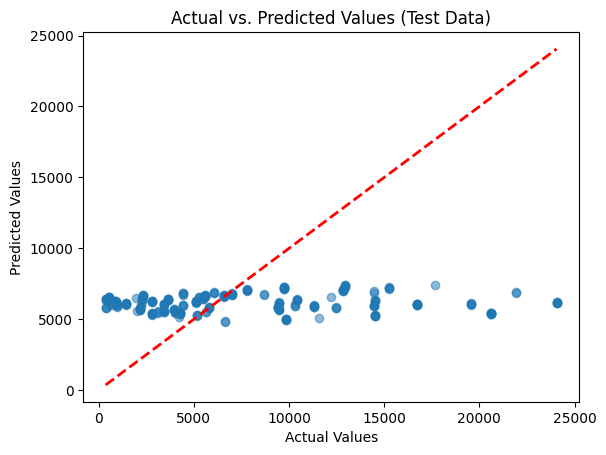

In [68]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values on the test data
plt.scatter(y_test, y_test_pred, alpha=0.5)  # alpha is for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [69]:
import pandas as pd

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Print the DataFrame
print(results)


      Actual    Predicted
824      639  6150.772616
549      527  6587.344339
365     5587  6644.467608
422     5101  6293.636029
904     3994  5542.288466
...      ...          ...
109     6089  6857.350932
390     5286  6483.855527
1205    9852  4988.772883
807      852  6262.864451
548     6612  6582.987586

[269 rows x 2 columns]


In [70]:

single_date = {'Year': [2024], 'Month': [7], 'Day': [6]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = svm_regressor.predict(x_test_single)
y_test_pred

array([5055.04179563])

Naiv Bays

In [71]:
from sklearn.naive_bayes import GaussianNB

# Step 3: Naive Bayes Model Training
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train)

# Step 4: Evaluation
y_train_pred_nb = nb_regressor.predict(X_train)
y_test_pred_nb = nb_regressor.predict(X_test)

# Calculate evaluation metrics for regression on training data
mse_train_nb = mean_squared_error(y_train, y_train_pred_nb)
r2_train_nb = r2_score(y_train, y_train_pred_nb)

# Calculate evaluation metrics for regression on test data
mse_test_nb = mean_squared_error(y_test, y_test_pred_nb)
r2_test_nb = r2_score(y_test, y_test_pred_nb)

print("Training Mean Squared Error (Naive Bayes):", mse_train_nb)
print("Training R-squared (Naive Bayes):", r2_train_nb)
print("Test Mean Squared Error (Naive Bayes):", mse_test_nb)
print("Test R-squared (Naive Bayes):", r2_test_nb)

# Check for overfitting
if mse_train_nb < mse_test_nb:
    print("The Naive Bayes model is not overfitting.")
else:
    print("The Naive Bayes model may be overfitting. Further analysis is needed.")


Training Mean Squared Error (Naive Bayes): 0.0
Training R-squared (Naive Bayes): 1.0
Test Mean Squared Error (Naive Bayes): 0.0
Test R-squared (Naive Bayes): 1.0
The Naive Bayes model may be overfitting. Further analysis is needed.


In [72]:
y_test_pred = nb_regressor.predict(X_test)

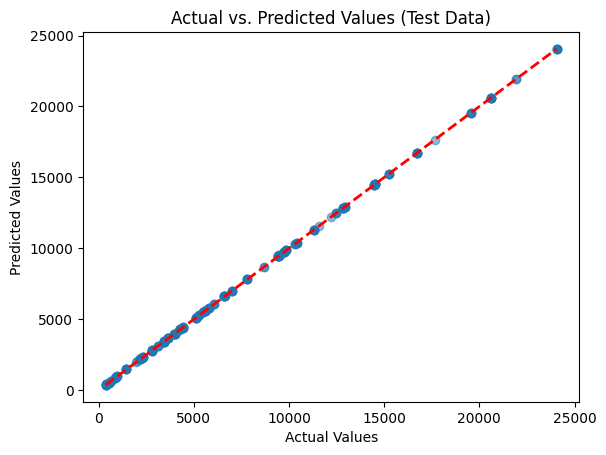

In [73]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values on the test data
plt.scatter(y_test, y_test_pred, alpha=0.5)  # alpha is for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [74]:
import pandas as pd

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Print the DataFrame
print(results)


      Actual  Predicted
824      639        639
549      527        527
365     5587       5587
422     5101       5101
904     3994       3994
...      ...        ...
109     6089       6089
390     5286       5286
1205    9852       9852
807      852        852
548     6612       6612

[269 rows x 2 columns]


In [75]:

single_date = {'Year': [2023], 'Month': [6], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([9503])

In [76]:

single_date = {'Year': [2023], 'Month': [7], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([5668])

In [77]:

single_date = {'Year': [2023], 'Month': [8], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = nb_regressor.predict(x_test_single)
y_test_pred

array([20627])